In [24]:
import os  # file paths
import glob # gathering csv's
import copy # deep copies
import pandas as pd  # dataframes
import numpy as np # numerical transformations and evenly spaced ticks
import scipy.stats as stats # statistical significance
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # plotting

# set working directory for relative file paths
while not os.getcwd().endswith("frm2"):
    print(f'current wd: {os.getcwd()} \n\t not "frm2/", changing ...')
    os.chdir("..")

print(f"wd: {os.getcwd()}")

wd: c:\Users\jak-w\OneDrive - University of Connecticut\1-Projects\frm2


In [25]:
# collect csv paths
csv_path = "results/.csv/trackmate/*.csv"
all_csv = glob.glob(csv_path)
csv_list = []
print(csv_list)
for filename in all_csv:
    img = str.split(filename, "\\")
    img = str(img[-1])
    img = img[:-11]
    df0 = pd.read_csv(filename, skiprows=3)
    df0["img"] = img
    csv_list.append(df0)
headers = pd.read_csv(all_csv[0])
headers["img"] = "img"
headers = headers.columns
df0 = pd.concat(csv_list, ignore_index=True)
df0.columns = headers.str.lower()
df0["treatment"] = df0.apply(
    lambda row: (
        "Control"
        if "ctrl" in row["img"].lower()
        else ("FRM2-KD" if "kd" in row["img"].lower() else row["treatment"])
    ),
    axis=1,
)
df0["experiment"] = df0.apply(
    lambda row: (
        1
        if "2024-05-05" in row["img"].lower()
        else (
            2
            if "2024-07-04" in row["img"].lower()
            else 3 if "2024-08-04" in row["img"].lower() else None
        )
    ),
    axis=1,
)
df0 = df0[
    df0.columns.difference(
        [
            "label",
            "track_id",
            "track_index",
            "track_start",
            "track_stop",
            "track_x_location",
            "track_y_location",
            "track_z_location",
            "number_complex",
            "number_gaps",
            "number_merges",
            "number_splits",
            "longest_gap",

        ]
    )
]
df0 = df0.dropna()
str_cols = ["img", "treatment", "experiment"]
treatments = df0["treatment"].unique()
num_cols = df0.columns.difference(str_cols).to_list()

for col in num_cols:
    lower_bound = df0.groupby("treatment")[col].transform(lambda x: x.quantile(0.01))
    upper_bound = df0.groupby("treatment")[col].transform(lambda x: x.quantile(0.99))
    df0 = df0[(df0[col] > lower_bound) & (df0[col] < upper_bound)]
df0_stats = df0.groupby("treatment")[num_cols].describe()
df0_stats

[]


confinement_ratio                                                    \
                      count      mean       std       min       25%       50%   
treatment                                                                       
Control              1434.0  0.334989  0.241425  0.022859  0.142019  0.263970   
FRM2-KD              1207.0  0.321267  0.232542  0.023125  0.132743  0.258946   

                              linearity_of_forward_progression            ...  \
                75%       max                            count      mean  ...   
treatment                                                                 ...   
Control    0.482305  0.989374                           1434.0  0.333689  ...   
FRM2-KD    0.460402  0.987550                           1207.0  0.320703  ...   

          track_min_speed           track_std_speed                      \
                      75%       max           count      mean       std   
treatment                                                                 
Control          0.118137  0.438175          1434.0  0.363225  0.302172   
FRM2-KD          0.118671  0.466340          1207.0  0.346211  0.280603   

                                                             
                min       25%       50%       75%       max  
treatment                                                    
Control    0.056642  0.156332  0.257667  0.459050  1.707181  
FRM2-KD    0.051903  0.149161  0.249702  0.456094  1.596037  

[2 rows x 120 columns]

In [26]:

df = copy.deepcopy(df0)
df = df[['treatment', 'experiment','img', 'track_max_speed']]
df.columns = ['treatment', 'experiment', 'img', 'speed']
df = df[df['speed'] >= 0.2]
df = df[df['speed'] <= 1]
mean_df = copy.deepcopy(df)
mean_df['speed'] = mean_df.groupby(['treatment', 'experiment'])['speed'].transform('mean')
mean_df.drop_duplicates(subset=['treatment', 'experiment', 'speed'], inplace=True)

str_cols = ['img', 'treatment', 'experiment']
treatments = df['treatment'].unique()
num_cols = df.columns.difference(str_cols).to_list()
df_stats = df.groupby('treatment')[num_cols].describe().T

mean_df

,treatment,experiment,img,speed
19,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_02,0.675975
207,FRM2-KD,1,2024-05-05_frm2-aid_mapple-rab6_kd_02,0.686646
396,Control,2,2024-07-04_frm2-aid_mapple-rab6_ctrl_01,0.572886
1649,FRM2-KD,2,2024-07-04_frm2-aid_mapple-rab6_kd_01,0.603609
2613,Control,3,2024-08-04_frm2-aid_mapple-rab6_ctrl_01,0.605733
3855,FRM2-KD,3,2024-08-04_frm2-aid_mapple-rab6_kd_01,0.596965


In [27]:
box_pal = ['#999999', '#FFBD57']
exp_pal = sns.cubehelix_palette(n_colors=3, start=3, rot=6, gamma=1, hue=2, light=0.8, dark=0.5)
exp_pal


[[0.521369913425669, 0.923489091921668, 0.8975475182211391],
 [0.39713589922150966, 0.7106718315435694, 1.0],
 [0.4978253225501107, 0.4123575525821416, 0.9938412804494992]]

In [28]:
df

,treatment,experiment,img,speed
19,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_02,0.457113
20,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_02,0.470005
21,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_02,0.714592
23,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_02,0.790207
35,Control,1,2024-05-05_frm2-aid_mapple-rab6_ctrl_03,0.468536
...,...,...,...,...
4867,FRM2-KD,3,2024-08-04_frm2-aid_mapple-rab6_kd_11,0.434029
4873,FRM2-KD,3,2024-08-04_frm2-aid_mapple-rab6_kd_11,0.543076
4874,FRM2-KD,3,2024-08-04_frm2-aid_mapple-rab6_kd_11,0.411639
4877,FRM2-KD,3,2024-08-04_frm2-aid_mapple-rab6_kd_11,0.579188


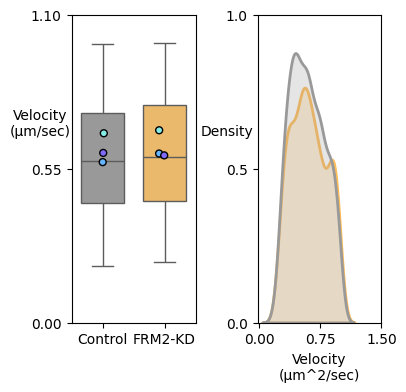

In [68]:
def format_col_title(col):
    col_parts = col.split("_")
    if len(col_parts) > 1:
        for i in range(len(col_parts)):
            if col_parts[i] == "track":
                col_parts[i] = ""  # Use assignment operator to remove "track"
            else:
                col_parts[i] = col_parts[i].capitalize()
        col = " ".join(
            col_parts
        ).strip()  # Use strip() to remove any leading/trailing spaces
    else:
        col = col.capitalize()
    return col

def customize_ticks(maximum, n_ticks=3,n_digits=2):
    min_y, max_y = 0, np.round(maximum, n_digits)
    custom_ticks = np.linspace(min_y, max_y, n_ticks)
    return custom_ticks

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4,4))

ax = axes[0]
sns.boxplot(
    data=df,
    x='treatment',
    y='speed',
    hue="treatment",
    palette=box_pal,
    width=0.7,
    ax=ax,
    legend=False,
)
sns.stripplot(
    data=mean_df,
    x='treatment',
    y='speed',
    hue='experiment',
    palette=exp_pal,
    ax=ax,
    jitter=True,
    dodge=False,
    edgecolor='black',
    linewidth=1,
    legend=False,
)
ax.set_xlabel("")
ax.set_ylabel("Velocity\n(μm/sec)", rotation=0, labelpad=22)
ax.yaxis.set_label_coords(-0.25, 0.6)
maximum = ax.get_yticks()[-1]
ax.set_yticks(customize_ticks(maximum))

ax = axes[1]
sns.kdeplot(
    data=df,
    x='speed',
    hue='treatment',
    palette=box_pal,
    fill=True,
    ax=ax,
    linewidth=2,
    multiple="layer",
    legend=False,
)
ax.set_xlabel(format_col_title('Velocity\n(μm^2/sec)'), rotation=0)
ax.set_ylabel("Density", rotation=0, loc='center')
ax.yaxis.set_label_coords(-0.25, 0.6)
maximum = ax.get_yticks()[-1]
ax.set_yticks(customize_ticks(maximum))

maximum = ax.get_xticks()[-1]
ax.set_xticks(customize_ticks(maximum, n_ticks=3, n_digits=2))


plt.subplots_adjust(wspace=.5)
plt.savefig('results/.svg/frm2-aid-rab6-velocity.svg', format='svg', dpi=300, bbox_inches='tight')
plt.savefig('results/.png/frm2-aid-rab6-velocity.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
